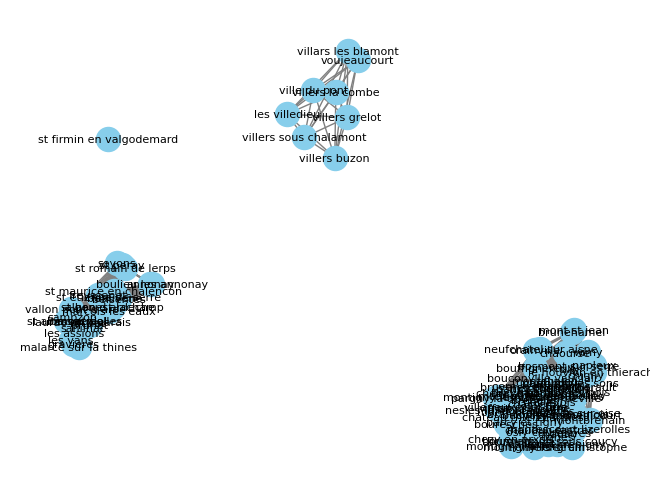

Chemin le plus court :
ville du pont -> voujeaucourt : 0.55 (Distance cumulée : 0.55)
Distance totale : 0.55


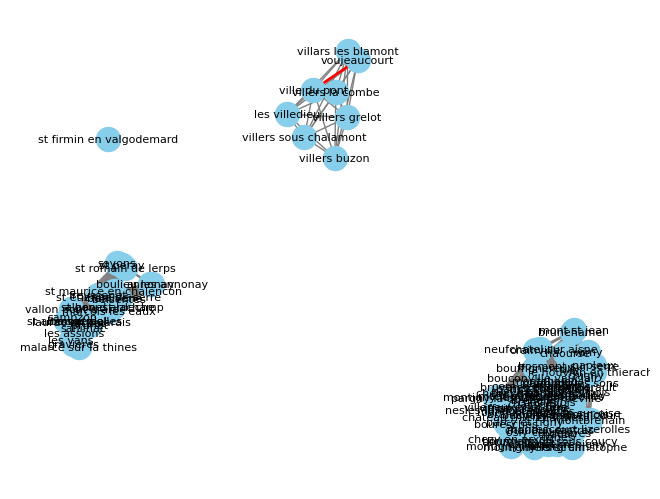

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

city_data_file = '../dataset/cities.csv'

def create_graph(city_data_file):
    """Crée un graphe à partir des 100 premières lignes du fichier de données des villes."""
    graph = nx.Graph()
    df = pd.read_csv(city_data_file, nrows=100)
    
    for _, row in df.iterrows():
        graph.add_node(row['label'], pos=(row['latitude'], row['longitude']))
    
    for _, city1 in df.iterrows():
        for _, city2 in df.iterrows():
            if city1['label'] != city2['label']:
                lat1, lon1 = city1['latitude'], city1['longitude']
                lat2, lon2 = city2['latitude'], city2['longitude']
                distance = ((lat2 - lat1)**2 + (lon2 - lon1)**2) ** 0.5
                
                if city1['department_name'] == city2['department_name'] or distance < 0.5:
                    graph.add_edge(city1['label'], city2['label'], weight=distance)
    
    return graph

def dijkstra(graph, start, target):
    """Implémente l'algorithme de Dijkstra pour trouver le chemin le plus court."""
    try:
        path = nx.dijkstra_path(graph, start, target, weight='weight')
        length = nx.dijkstra_path_length(graph, start, target, weight='weight')
        return path, length
    except nx.NetworkXNoPath:
        return None, None

def print_path_details(graph, path):
    """Affiche le chemin avec la distance cumulée à chaque étape."""
    if path:
        total_distance = 0
        print("Chemin le plus court :")
        for i in range(len(path) - 1):
            start = path[i]
            end = path[i + 1]
            distance = graph.edges[start, end]['weight']
            total_distance += distance
            print(f"{start} -> {end} : {distance:.2f} (Distance cumulée : {total_distance:.2f})")
        print(f"Distance totale : {total_distance:.2f}")
    else:
        print("Aucun chemin trouvé.")

def draw_graph(graph):
    """Affiche le graphe avec les positions des villes."""
    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, node_size=300, font_size=8, node_color="skyblue", edge_color="gray")
    plt.show()

graph = create_graph(city_data_file)
draw_graph(graph)

start_city = 'ville du pont'
target_city = 'voujeaucourt'
path, length = dijkstra(graph, start_city, target_city)
print_path_details(graph, path)

if path:
    path_edges = list(zip(path, path[1:]))
    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, node_size=300, font_size=8, node_color="skyblue", edge_color="gray")
    nx.draw_networkx_edges(graph, pos=pos, edgelist=path_edges, edge_color="red", width=2)
    plt.show()
else:
    print(f"Aucun chemin trouvé entre {start_city} et {target_city}.")